In [2]:
# train_iris_pickle.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# 1) Load data
iris = load_iris()
X, y = iris.data, iris.target

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 4) Evaluate
acc = accuracy_score(y_test, model.predict(X_test))
print(f"Accuracy (test): {acc:.4f}")

# 5) Save with **pickle** (สำคัญ: ให้ตรงกับ Flask ที่ใช้ pickle.load)
with open("iris_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Saved model to iris_model.pkl")


Accuracy (test): 0.9000
Saved model to iris_model.pkl


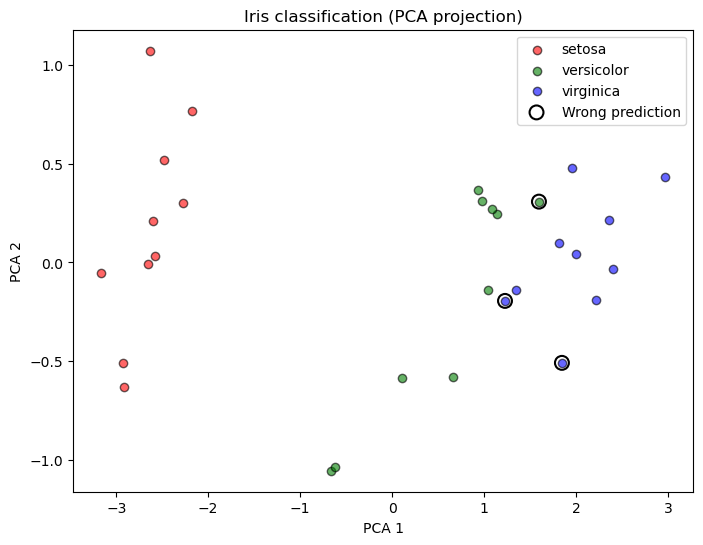

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ทำนายข้อมูลทดสอบ
y_pred = model.predict(X_test)

# ลดมิติจาก 4 -> 2 เพื่อ plot
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# สร้าง plot
plt.figure(figsize=(8, 6))
for i, color, label in zip(range(3), ['red', 'green', 'blue'], iris.target_names):
    idx = (y_test == i)
    plt.scatter(
        X_test_2d[idx, 0], 
        X_test_2d[idx, 1], 
        c=color, 
        label=label, 
        alpha=0.6, 
        edgecolor='k'
    )

# วงรอบจุดที่ทำนายผิด
wrong_idx = (y_pred != y_test)
plt.scatter(
    X_test_2d[wrong_idx, 0], 
    X_test_2d[wrong_idx, 1], 
    facecolors='none', 
    edgecolors='black', 
    s=100, 
    linewidths=1.5, 
    label='Wrong prediction'
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Iris classification (PCA projection)")
plt.legend()
plt.show()


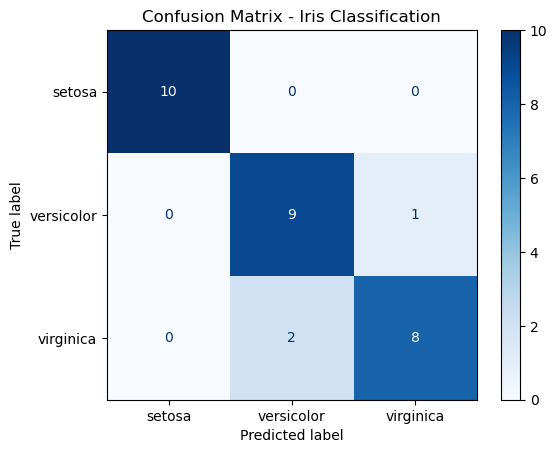

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ทำนายข้อมูลทดสอบ
y_pred = model.predict(X_test)

# สร้าง confusion matrix
cm = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix เป็นภาพ
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Iris Classification")
plt.show()
